In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn 
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA

In [9]:
# load the dataset
training_df = pd.read_excel('drought_training_df_without_outliers.xlsx')

training_df

,339,341,342,344,345,346,348,349,351,352,...,2499,2501,2503,2505,2507,2509,2511,2514,2516,Water Potential (Mpa)
0,0.1481,0.1818,0.1748,0.1486,0.1045,0.0782,0.0904,0.0830,0.1101,0.1168,...,0.0332,0.0347,0.0323,0.0308,0.0360,0.0346,0.0320,0.0328,0.0344,-0.089632
1,0.1422,0.1360,0.1384,0.1283,0.1103,0.0967,0.1014,0.1040,0.0934,0.0819,...,0.0560,0.0589,0.0560,0.0551,0.0563,0.0554,0.0533,0.0547,0.0528,-0.148237
2,0.0978,0.0920,0.1038,0.0981,0.0793,0.0613,0.0477,0.0520,0.0545,0.0698,...,0.0280,0.0252,0.0269,0.0275,0.0293,0.0311,0.0284,0.0279,0.0294,-0.128243
3,0.1422,0.1360,0.1538,0.1283,0.1241,0.1161,0.1074,0.0876,0.0831,0.0722,...,0.0456,0.0473,0.0484,0.0452,0.0428,0.0450,0.0486,0.0425,0.0479,-0.164785
4,0.1333,0.1280,0.1307,0.0981,0.1034,0.0838,0.0776,0.0767,0.0779,0.0722,...,0.0373,0.0347,0.0323,0.0330,0.0360,0.0369,0.0344,0.0340,0.0405,-0.326122
5,0.0889,0.1040,0.1000,0.1056,0.0896,0.0839,0.0836,0.0877,0.0831,0.0723,...,0.0394,0.0368,0.0344,0.0330,0.0349,0.0334,0.0332,0.0340,0.0356,-0.147548
6,0.0978,0.0800,0.0769,0.0604,0.0552,0.0967,0.0776,0.0712,0.0779,0.0482,...,0.0238,0.0252,0.0226,0.0242,0.0225,0.0208,0.0225,0.0231,0.0245,-0.252348
7,0.1052,0.0733,0.1128,0.1072,0.0985,0.1134,0.1044,0.0855,0.0549,0.0608,...,0.0278,0.0261,0.0245,0.0251,0.0232,0.0225,0.0220,0.0201,0.0292,-0.474359
8,0.1626,0.1466,0.1476,0.1072,0.1062,0.1064,0.0718,0.1099,0.0989,0.0913,...,0.0353,0.0347,0.0345,0.0365,0.0360,0.0320,0.0317,0.0314,0.0342,-0.649486
9,0.1486,0.1351,0.1282,0.1176,0.1505,0.1414,0.1603,0.1304,0.1056,0.0763,...,0.0382,0.0387,0.0395,0.0395,0.0393,0.0401,0.0400,0.0373,0.0350,-0.408859


In [10]:
# ---------------------------------
# Define predictors and target
# ---------------------------------
predictors = training_df.drop(columns = ['Water Potential (Mpa)'])
target = training_df['Water Potential (Mpa)']

# <font color = Orange> Principal Component Analysis (PCA)

Number of components that explain at least 95% of the variance: 3


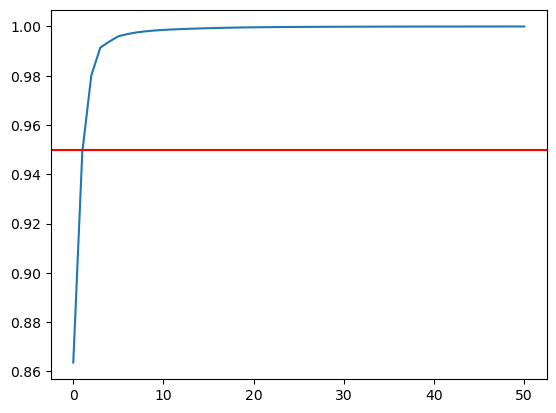

In [11]:
# Create an instance of PCA
pca = PCA(random_state=37)

# Perform PCA on the predictors DF
pca.fit(predictors)

# Calculate the cumulative sum of the explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance with a vertical line at 95%
plt.plot(cumulative_explained_variance)
plt.axhline(y=0.95, color='r', linestyle='-')

# Find the number of components that explain at least 95% of the variance
pca_n_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1

print(f'Number of components that explain at least 95% of the variance: {pca_n_components}')

In [12]:
# Define the number of components for PCA
n_components = pca_n_components

# Create an empty DataFrame called results_pca to store the results.
results_pca = pd.DataFrame()

# Create an instance of PCA
pca = PCA(n_components=n_components, random_state=37)

# Perform PCA on the features_df DataFrame
pca.fit(predictors)

# Transform the data
transformed_data = pca.transform(predictors)

# Create a new DataFrame to store the PCA-transformed data
results_pca = pd.DataFrame(transformed_data, columns=[f'Component_{i+1}' for i in range(n_components)])
results_pca.head()

,Component_1,Component_2,Component_3
0,0.831198,-0.074075,0.711299
1,0.502507,0.082467,0.082510
2,-1.750064,-0.026456,-0.060663
3,1.486709,-0.297136,0.076482
4,0.802800,-0.519536,-0.233493


In [19]:
# Get the loadings from the PCA object
loadings = pca.components_

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(loadings, columns=predictors.columns, index=[f'Component_{i+1}' for i in range(n_components)])

# Define the number of top features to select
top_features_count = 3

# Create an empty DataFrame to store the top features
top_features_df = pd.DataFrame(index=[f'Component_{i+1}' for i in range(n_components)])

# Iterate over each principal component
for component in range(n_components):
    # Get the loadings for the current component
    component_loadings = loadings_df.loc[f'Component_{component+1}']
    
    # Sort the absolute values of the loadings in descending order
    sorted_loadings = component_loadings.abs().sort_values(ascending=False)
    
    # Select the top features
    top_features = sorted_loadings.head(top_features_count)
    
    # Store the top features in the DataFrame
    top_features_df[f'Top_{top_features_count}_Features_Component_{component+1}'] = top_features.index

top_features_df

,Top_3_Features_Component_1,Top_3_Features_Component_2,Top_3_Features_Component_3
Component_1,1065,1891,554
Component_2,1053,1887,555
Component_3,1072,1894,552


In [16]:
# Save results as a csv file
# results.to_csv('../data/pca_data.csv', index=False)